In [50]:
#pip install tensorflow
# pip install tflearn
# pip  install tqdm (making it seem prettier than what it really is)
#NOTE
#Could not git commit files larger than 50MB, thus download the dataset from 
#https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition 

import cv2
import numpy as np #for arrays ofcourse
import os
import tensorflow
import tensorboard

from random import shuffle
from tqdm import tqdm

TRAIN_DIR = '/home/dev/Downloads/train'
TEST_DIR = '/home/dev/Downloads/test'
IMG_SIZE = 50 #this is is in essence the standard pic size
#IMG_SIZE = np.expand_dims(IMG_SIZ, axis=0)
LR = 1e-1

MODEL_NAME = 'dogsvscats--{}-{}.model'.format(LR, '6conv-basic-video')

In [4]:
def label_img(img):
    #dog.93.png splitting this in 3
    word_label = img.split('.')[-3]
    if word_label == 'cat': return[1,0]
    elif word_label == 'dog': return [0,1]

In [5]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [6]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
            path = os.path.join(TEST_DIR, img)
            img_num = img.split('.')[0]
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
            testing_data.append([np.array(img), img_num])
                
    np.save('test_data.npy', testing_data)
    return testing_data

In [7]:
train_data = create_train_data() 
#if you have trainied data
#train_data = np.load('train_data.npy')


100%|██████████| 25000/25000 [00:35<00:00, 706.33it/s]


In [46]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
#import tflearn.datasets.mnist as mnist

#X = X.reshape([-1, IMG_SIZE, IMG_SIZE, 1])
#test_x = test_x.reshape([-1, IMG_SIZE, IMG_SIZE, 1])

import tensorflow as tf
tf.reset_default_graph()


convnet = input_data(shape=[None, 50, 50, 1], name='input')


convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')
    

In [56]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model has loaded!')

INFO:tensorflow:Restoring parameters from /home/dev/Desktop/Classifier/dogsvscats--0.1-6conv-basic-video.model
model has loaded!


In [52]:
train = train_data[:-15000] 
#the data except the last 500
test = train_data[-1500:]

In [53]:
#X = tf.placeholder(tf.float32 , [None ,28 , 28 , 1])
#X = tf.reshape(X , [-1 , 784])
#X = np.expand_dims(IMG_SIZ, axis=0)

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]


#test_x = np.expand_dims(IMG_SIZ, axis=0)
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#test_x = np.reshape(test_x, (-1, 28, 28, 1))
test_y = [i[1] for i in test]


In [26]:
#X = np.expand_dims(IMG_SIZE, axis=0)
#Testing with 4 layers

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)


Training Step: 470  | total loss: 0.66701 | time: 37.635s
| Adam | epoch: 003 | loss: 0.66701 - acc: 0.6114 -- iter: 09984/10000
Training Step: 471  | total loss: 0.67095 | time: 39.114s
| Adam | epoch: 003 | loss: 0.67095 - acc: 0.6050 | val_loss: 0.68482 - val_acc: 0.5540 -- iter: 10000/10000
--


In [29]:
#X = np.expand_dims(IMG_SIZE, axis=0)#X = np.expand_dims(IMG_SIZE, axis=0)

model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
#testing with 6 layers

model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 784  | total loss: 0.54904 | time: 34.236s
| Adam | epoch: 005 | loss: 0.54904 - acc: 0.7335 -- iter: 09984/10000
Training Step: 785  | total loss: 0.55002 | time: 35.558s
| Adam | epoch: 005 | loss: 0.55002 - acc: 0.7274 | val_loss: 0.60153 - val_acc: 0.6880 -- iter: 10000/10000
--


In [31]:
#X = np.expand_dims(IMG_SIZE, axis=0)
#testing with 7 layers & 10 000 samples

model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 784  | total loss: 0.57099 | time: 35.077s
| Adam | epoch: 005 | loss: 0.57099 - acc: 0.7049 -- iter: 09984/10000
Training Step: 785  | total loss: 0.57345 | time: 36.491s
| Adam | epoch: 005 | loss: 0.57345 - acc: 0.6969 | val_loss: 0.57819 - val_acc: 0.7020 -- iter: 10000/10000
--


In [43]:
#X = np.expand_dims(IMG_SIZE, axis=0)
#testing with 6 layers & 20 000 samples
#size 28 by 28
#TERRIBLE!!!

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 941  | total loss: 0.53705 | time: 35.970s
| Adam | epoch: 006 | loss: 0.53705 - acc: 0.7376 -- iter: 09984/10000
Training Step: 942  | total loss: 0.52729 | time: 37.397s
| Adam | epoch: 006 | loss: 0.52729 - acc: 0.7482 | val_loss: 0.54579 - val_acc: 0.7413 -- iter: 10000/10000
--


In [47]:
#X = np.expand_dims(IMG_SIZE, axis=0)
#testing with 5 layers & 20 000 samples


model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1564  | total loss: 0.47677 | time: 73.641s
| Adam | epoch: 005 | loss: 0.47677 - acc: 0.7780 -- iter: 19968/20000
Training Step: 1565  | total loss: 0.46962 | time: 74.905s
| Adam | epoch: 005 | loss: 0.46962 - acc: 0.7845 | val_loss: 0.55567 - val_acc: 0.7233 -- iter: 20000/20000
--


In [62]:
#X = np.expand_dims(IMG_SIZE, axis=0)
#testing with 6 layers & 10 000 samples
#increasing the number of epics seems to improve it. and the more that you actually do it the better
#after running it with 10 epocs we made 98%. 

model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 6501  | total loss: 0.05476 | time: 37.563s
| Adam | epoch: 032 | loss: 0.05476 - acc: 0.9812 -- iter: 09984/10000
Training Step: 6502  | total loss: 0.05234 | time: 38.919s
| Adam | epoch: 032 | loss: 0.05234 - acc: 0.9815 | val_loss: 1.04704 - val_acc: 0.7747 -- iter: 10000/10000
--


In [64]:
##########################################
# COMPLETE THIS IS THE FINAL TRAINING SET #
##########################################

#increasing the number of epics seems to improve it. and the more that you actually do it the better
#after running it with 25 epics and a LR of 0.001 gives a 95% Accuracy.

model.fit({'input': X}, {'targets': Y}, n_epoch=25, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 10450  | total loss: 0.27573 | time: 34.883s
| Adam | epoch: 058 | loss: 0.27573 - acc: 0.9537 -- iter: 09984/10000
Training Step: 10451  | total loss: 0.25143 | time: 36.137s
| Adam | epoch: 058 | loss: 0.25143 - acc: 0.9568 | val_loss: 0.89988 - val_acc: 0.7680 -- iter: 10000/10000
--


In [54]:
#X = np.expand_dims(IMG_SIZE, axis=0)
#testing with 6 layers & 10 000 samples
#YAAAAY 93% accuracy... beautiful

model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 4699  | total loss: 0.19481 | time: 37.648s
| Adam | epoch: 020 | loss: 0.19481 - acc: 0.9303 -- iter: 09984/10000
Training Step: 4700  | total loss: 0.18648 | time: 39.036s
| Adam | epoch: 020 | loss: 0.18648 - acc: 0.9326 | val_loss: 0.67772 - val_acc: 0.7793 -- iter: 10000/10000
--


In [65]:
model.save(MODEL_NAME)

INFO:tensorflow:/home/dev/Desktop/Classifier/dogsvscats--0.1-6conv-basic-video.model is not in all_model_checkpoint_paths. Manually adding it.



 80%|███████▉  | 9948/12500 [00:15<00:03, 650.51it/s]


100%|██████████| 12500/12500 [00:22<00:00, 567.32it/s]

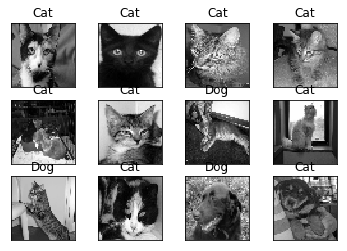

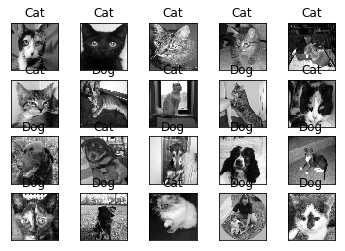

In [69]:
import matplotlib.pyplot as plt

#if you dont have the file yet
test_data = process_test_data()
#if you already have it
#test_dat = np.load('test_data.npy')

fig = plt.figure()

for num, data in enumerate(test_data[:20]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4,5,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label = 'Cat'
    
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
    

In [59]:
with open('submission-file.csv', 'w') as f:
    f.write('id,lable\n')

In [60]:
with open('submission-file.csv', 'a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num, model_out[1]))


 29%|██▉       | 3646/12500 [00:15<00:38, 229.21it/s]


 61%|██████    | 7563/12500 [00:31<00:20, 240.56it/s]


 89%|████████▉ | 11143/12500 [00:46<00:05, 238.39it/s]


100%|██████████| 12500/12500 [00:51<00:00, 240.82it/s]

In [ ]:
##########################################
# COMPLETE THIS IS THE FINAL TRAINING SET #
##########################################


#:) 